# Two-Class Classification on South African Heart Disease dataset
- Dataset from: https://web.stanford.edu/~hastie/ElemStatLearn/data.html
- I will create a Two-Class Classifier with the Random Forest Classifier

In [1]:
# importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# importing training and testing data from .csv format
heart_data = pd.read_csv('saheart.csv', sep = ',', header = 0)

# splitting data into X (features) and y (label)
X = heart_data.loc[:,['sbp', 'tobacco', 'ldl', 'adiposity', 'typea', 'obesity', 'alcohol', 'age']] # removed 'famhist' since it is provides no information
y = heart_data.loc[:,['chd']]

# split into training and testing data (75% and 25% split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [3]:
# RANDOM FOREST CLASSIFIER
rf = RandomForestClassifier(n_estimators = 3000, criterion= 'entropy', random_state = 42).fit(X_train, y_train.values.ravel())
y_pred = rf.predict(X_test)

Text(0.5, 257.44, 'Predicted label')

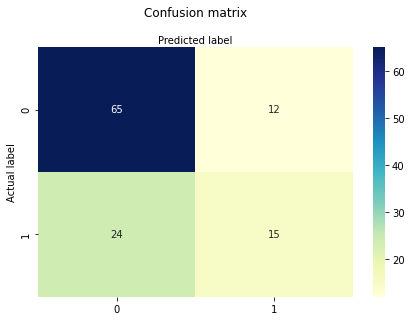

In [4]:
# create a confusion matrix to visualise accuracy
matrix = metrics.confusion_matrix(y_test, y_pred)
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [5]:
# calculate accuracy of model
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))

Accuracy: 0.6896551724137931
Precision: 0.5555555555555556
Recall: 0.38461538461538464
